In [108]:
#import libraries

import numpy as np 
import pandas as pd
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns

In [31]:
#define-dataset

train = pd.read_csv("mnist_train.csv")
test = pd.read_csv("mnist_test.csv")
y,X = train["label"],train.drop(columns="label")
#x.nunique()
#x.shape
#x.max().max()
X = X/255

In [35]:
#trian-model

model = MLPClassifier(hidden_layer_sizes=(100,),solver="sgd",max_iter=100 ,alpha=1e-4 ,learning_rate_init=.1, verbose=2, tol=1e-4).fit(X,y)


Iteration 1, loss = 0.29452739
Iteration 2, loss = 0.12733231
Iteration 3, loss = 0.09133674
Iteration 4, loss = 0.07163099
Iteration 5, loss = 0.05823469
Iteration 6, loss = 0.04926046
Iteration 7, loss = 0.04097468
Iteration 8, loss = 0.03465559
Iteration 9, loss = 0.03027674
Iteration 10, loss = 0.02502396
Iteration 11, loss = 0.02142587
Iteration 12, loss = 0.01770000
Iteration 13, loss = 0.01489269
Iteration 14, loss = 0.01317766
Iteration 15, loss = 0.01050978
Iteration 16, loss = 0.00918510
Iteration 17, loss = 0.00758413
Iteration 18, loss = 0.00620036
Iteration 19, loss = 0.00559328
Iteration 20, loss = 0.00439287
Iteration 21, loss = 0.00391391
Iteration 22, loss = 0.00348714
Iteration 23, loss = 0.00315319
Iteration 24, loss = 0.00289410
Iteration 25, loss = 0.00266868
Iteration 26, loss = 0.00242297
Iteration 27, loss = 0.00225260
Iteration 28, loss = 0.00209107
Iteration 29, loss = 0.00197190
Iteration 30, loss = 0.00187890
Iteration 31, loss = 0.00177579
Iteration 32, los

In [51]:
#statistics-report

ty, tX = test["label"],test.drop(columns="label")
pdn = model.predict(tX/255)
print(classification_report(ty,pdn))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [54]:
#check overfitting

scores = cross_val_score(model,X,y,cv=10)
print(scores)

Iteration 1, loss = 0.31666090
Iteration 2, loss = 0.13518303
Iteration 3, loss = 0.09380197
Iteration 4, loss = 0.07303347
Iteration 5, loss = 0.05945715
Iteration 6, loss = 0.04798760
Iteration 7, loss = 0.04040568
Iteration 8, loss = 0.03448000
Iteration 9, loss = 0.02966349
Iteration 10, loss = 0.02334338
Iteration 11, loss = 0.02075338
Iteration 12, loss = 0.01732827
Iteration 13, loss = 0.01510088
Iteration 14, loss = 0.01257691
Iteration 15, loss = 0.01111981
Iteration 16, loss = 0.00892075
Iteration 17, loss = 0.00770130
Iteration 18, loss = 0.00671522
Iteration 19, loss = 0.00532116
Iteration 20, loss = 0.00467737
Iteration 21, loss = 0.00402693
Iteration 22, loss = 0.00370790
Iteration 23, loss = 0.00322006
Iteration 24, loss = 0.00291834
Iteration 25, loss = 0.00282829
Iteration 26, loss = 0.00246524
Iteration 27, loss = 0.00232179
Iteration 28, loss = 0.00218591
Iteration 29, loss = 0.00204770
Iteration 30, loss = 0.00190905
Iteration 31, loss = 0.00185903
Iteration 32, los

In [107]:
#show cv-report
reportcv = pd.DataFrame({"Scores":scores})
new_index = ["K-Fold "+str(i) for i in reportcv.index]
reportcv.index = new_index
reportcv

,Scores
K-Fold 0,0.978500
K-Fold 1,0.979833
K-Fold 2,0.975000
K-Fold 3,0.978833
K-Fold 4,0.976833
K-Fold 5,0.979333
K-Fold 6,0.976333
K-Fold 7,0.972667
K-Fold 8,0.974333
K-Fold 9,0.981667


In [105]:
#compare validation & Test 

print(f"Your maximum validation score is = {round(scores.max(),4)} and test score is = {round(accuracy_score(ty,pdn),4)}")


Your maximum validation score is = 0.9817 and test score is = 0.9808


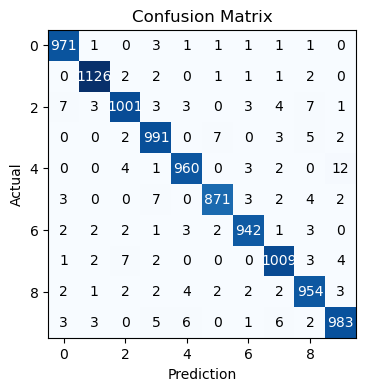

In [98]:
#plot confusion matrix

cm = confusion_matrix(ty,pdn)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(4,4))
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Text(0.5, 1.0, 'Cv-Accuracy (per Epoch)')

<Figure size 1920x1440 with 0 Axes>

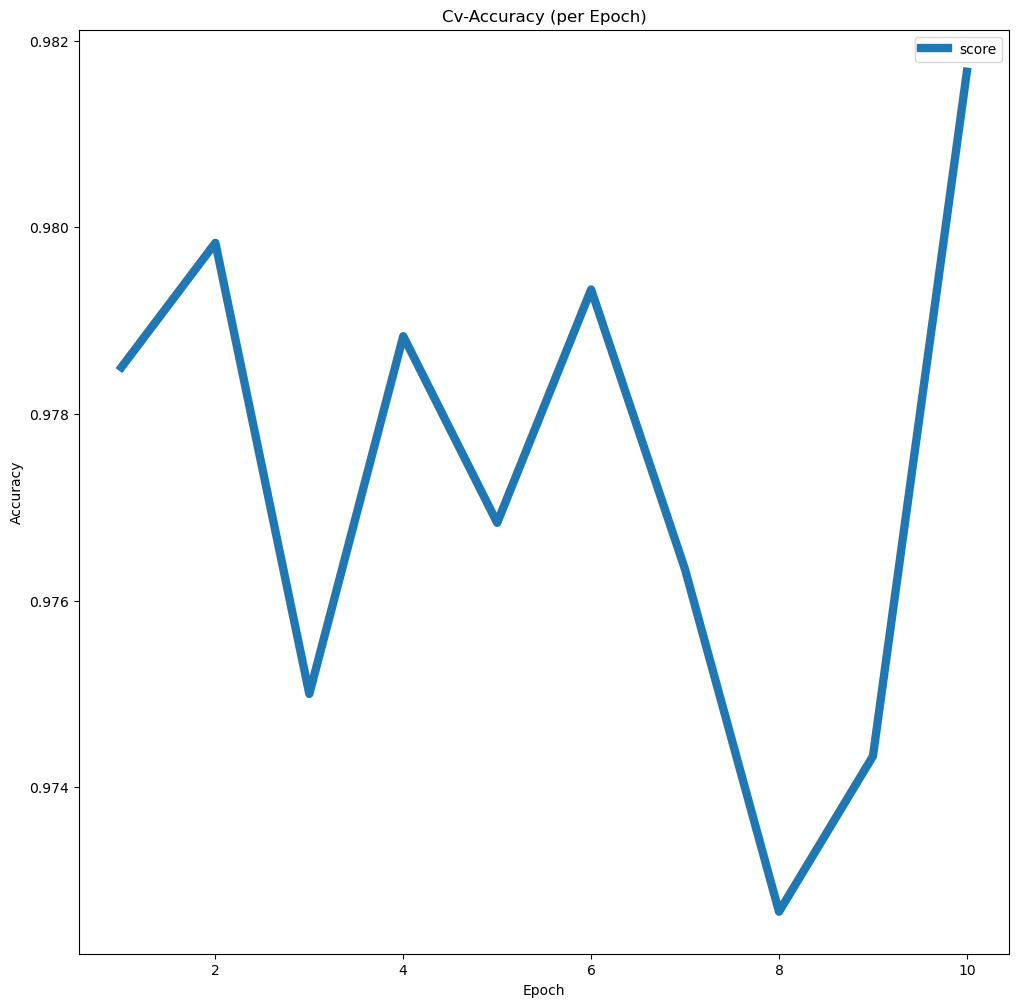

In [130]:
#point to point plot 

plotcv = pd.DataFrame(reportcv,columns=["index","score"])
plotcv["index"] = np.arange(1,11)
plotcv["score"] = scores

plt.figure(dpi=300)
ax = plotcv.set_index("index").plot(figsize=(12,12),linewidth=6)
ax.set(xlabel="Epoch",ylabel="Accuracy")
plt.title("Cv-Accuracy (per Epoch)")